In [1]:
import pandas as pd
from pydataset import data
from matplotlib import pyplot as plt

%matplotlib inline

# Matplotlib customizations.
plt.style.use("ggplot")                       # Use a different style.
plt.rcParams["figure.figsize"] = [10.0, 6.0]  # Make figures larger by default.
plt.rcParams["figure.dpi"] = 200              # Raise figure quality within the notebook.

# Pandas customizations.
pd.set_option("display.max_rows", 250)        # Raise the number of rows displayed.
pd.set_option("display.max_columns", 50)      # Raise the number of columns displayed.
pd.set_option("precision", 3)                 # Truncate floats to 3 decimals in data frames.

## Problem 1

Examine the following data sets from pydataset and answer the corresponding questions. Use visualizations to support your conclusions.
- `"iris"`, measurements of various species of iris flowers.
    1. Which species is easiest to distinguish from the others? How?
    2. Given iris data without a species label, what strategies could you use to identify the flower’s species?

In [2]:
#data('iris', show_doc=True)
iris = data('iris')
iris.sample(10)
iris['Sepal.Ratio'] = iris['Sepal.Length']/iris['Sepal.Width']
iris['Petal.Ratio'] = iris['Petal.Length']/iris['Petal.Width']

[]

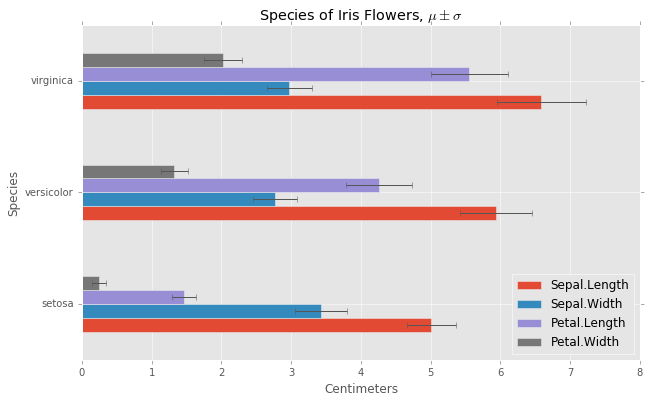

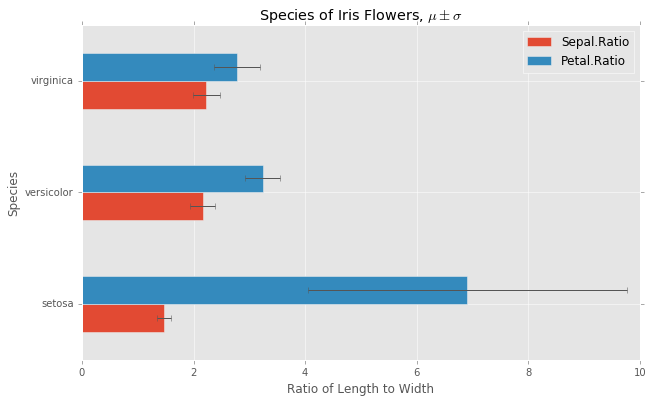

In [3]:
species = iris.groupby('Species')
species[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']].mean().plot(kind='barh', xerr=species[['Sepal.Length','Sepal.Width','Petal.Length', 'Petal.Width']].std(), title=r"Species of Iris Flowers, $\mu\pm\sigma$")
plt.xlabel("Centimeters")
species[['Sepal.Ratio','Petal.Ratio']].mean().plot(kind='barh', xerr=species[['Sepal.Ratio','Petal.Ratio']].std(), title=r"Species of Iris Flowers, $\mu\pm\sigma$")
plt.xlabel("Ratio of Length to Width")
plt.plot()

I would argue that setosa is the easiest to distinguish because of the petal length/width ratio. If an iris has really long and skinny petals, it is likely a setosa. If the flower is just bigger in general than other iris flowers you've been seeing it's probably a virginica. Otherwise, it's probably a versicolor.

- `"poisons"`, experimental results of three different poisons and four different treatments.
    1. In general, which poison is most deadly? Which treatment is most effective?
    2. If you were poisoned, how would you choose the treatment if you did not know which poison it was? What if you did know which poison it was?
(Hint: group the data by poison, then group each subset by treatment.)

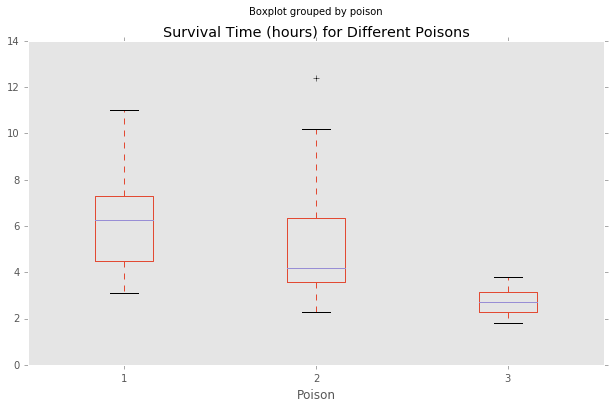

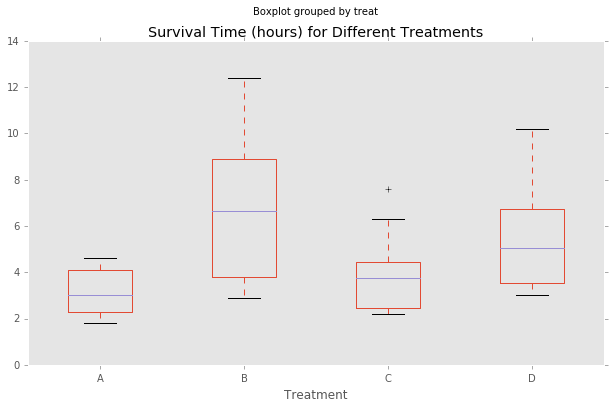

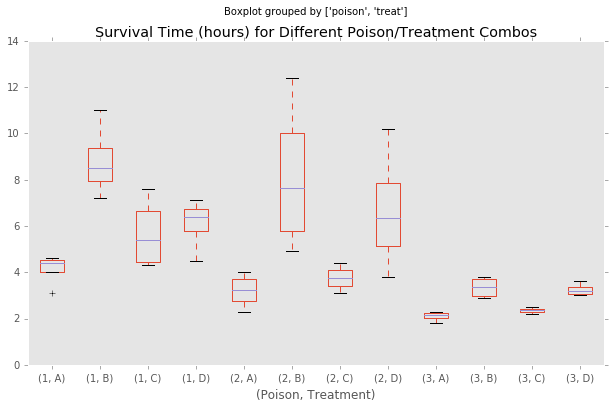

In [4]:
# data('poisons', show_doc=True)
poisons = data('poisons')
poisons['time'] = poisons['time']*10
poison = poisons.groupby('poison')
treatments = poisons.groupby('treat')
poisons.boxplot(['time'], by="poison", grid=False)
plt.title("Survival Time (hours) for Different Poisons")
plt.xlabel("Poison")
poisons.boxplot(['time'], by="treat", grid=False)
plt.title("Survival Time (hours) for Different Treatments")
plt.xlabel("Treatment")
poisons.boxplot(['time'], by=["poison", 'treat'], grid=False)
plt.title("Survival Time (hours) for Different Poison/Treatment Combos")
plt.xlabel("(Poison, Treatment)")
plt.show()

Poison 3 is most deadly.

Treatment B is most effective and I would choose it if I didn't know the poison.

I would choose treatment B regardless of the poison because it has the highest mean and the highest max for every poison.

- `"diamonds"`, prices and characteristics of almost 54,000 round-cut diamonds.
    1. How does the color and cut of a diamond affect its price?
    2. Of the diamonds with color `"H"`, those with a `"Fair"` cut sell, on average, for a higher price than those with an `"Ideal"` (superior) cut. What other factors could explain this unintuitive statistic?

In [5]:
#data('diamonds', show_doc=True)
diamonds = data('diamonds')
#diamonds.sample(20)

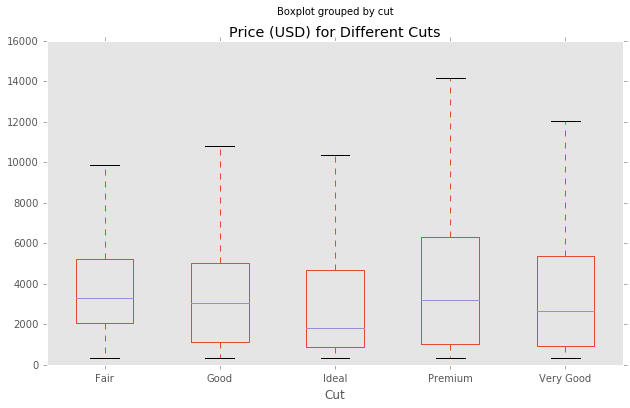

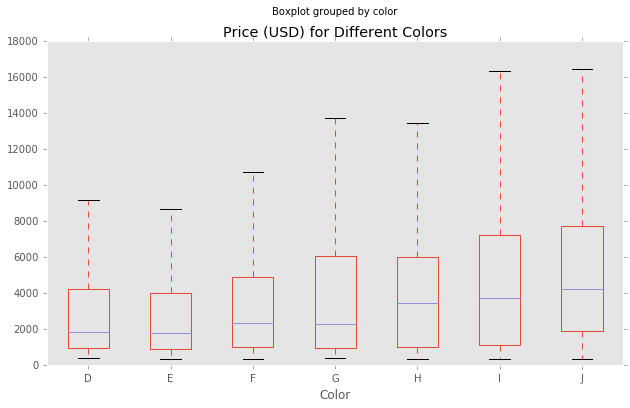

In [6]:
diamonds.boxplot('price', by=['cut'], grid=False, showfliers=False)
plt.title("Price (USD) for Different Cuts")
plt.xlabel("Cut")
diamonds.boxplot('price', by=['color'], grid=False, showfliers=False)
plt.title("Price (USD) for Different Colors")
plt.xlabel("Color")
plt.show()

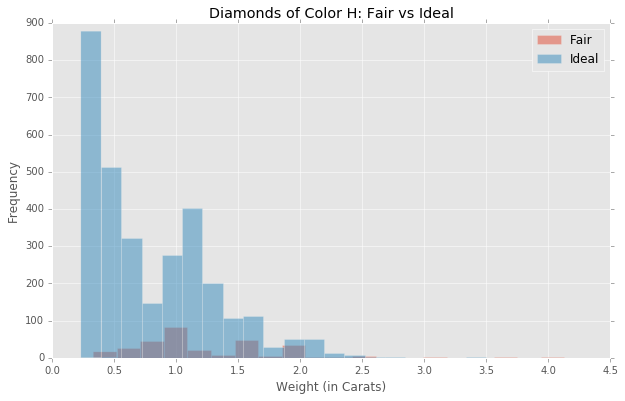

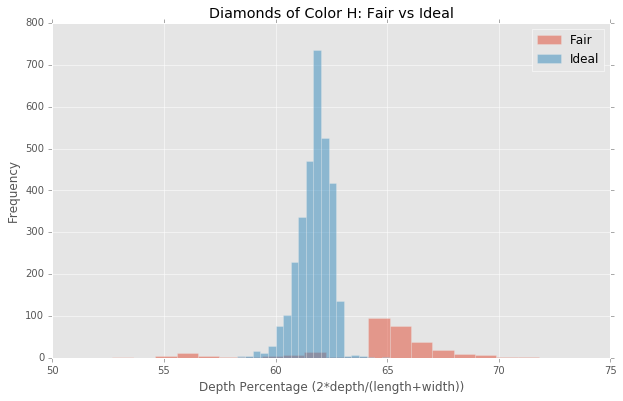

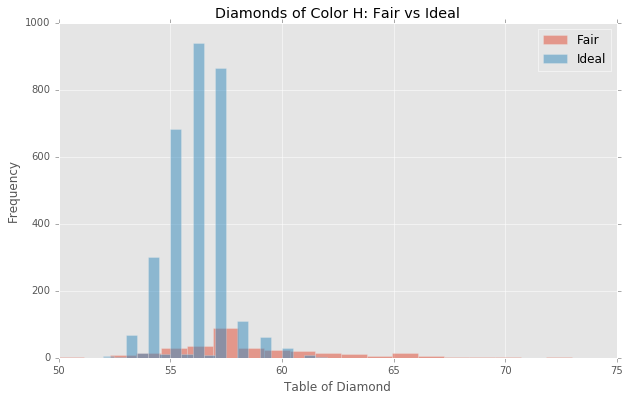

In [33]:
hdiamonds = diamonds[diamonds['color']=='H']
ax = hdiamonds[hdiamonds['cut']=='Fair']['carat'].plot(kind='hist', grid=False, bins=20, alpha=.5, label='Fair')
hdiamonds[hdiamonds['cut']=='Ideal']['carat'].plot(kind='hist', ax=ax, bins=20, alpha=.5, label='Ideal')
plt.legend()
plt.title("Diamonds of Color H: Fair vs Ideal")
plt.xlabel("Weight (in Carats)")
plt.show()

hdiamonds = diamonds[diamonds['color']=='H']
ax = hdiamonds[hdiamonds['cut']=='Fair']['depth'].plot(kind='hist', grid=False, bins=20, alpha=.5, label='Fair')
hdiamonds[hdiamonds['cut']=='Ideal']['depth'].plot(kind='hist', ax=ax, bins=20, alpha=.5, label='Ideal')
plt.legend()
plt.title("Diamonds of Color H: Fair vs Ideal")
plt.xlabel("Depth Percentage (2*depth/(length+width))")
plt.show()

hdiamonds = diamonds[diamonds['color']=='H']
ax = hdiamonds[hdiamonds['cut']=='Fair']['table'].plot(kind='hist', grid=False, bins=20, alpha=.5, label='Fair')
hdiamonds[hdiamonds['cut']=='Ideal']['table'].plot(kind='hist', ax=ax, bins=20, alpha=.5, label='Ideal')
plt.legend()
plt.title("Diamonds of Color H: Fair vs Ideal")
plt.xlabel("Table of Diamond")
plt.show()

We see above often times Fair cut diamonds may be larger in other characteristics, such as weight, depth, or table. This may cause their price to be higher than Ideal cut diamonds. Also, it's possible that people who would be willing to pay very much for an Ideal cut diamond would not be willing to pay much for these diamonds, since the color is next-to-worst. However, if someone is willing to make sacrifices with regard to cut, they might be willing to compromise on color as well, if their goal is to get a bigger diamond. 

(If I'm wrong please don't mark off points just because I have never been wedding ring shopping. Believe me, I wish I had an occasion to shop for rings and better understand what makes a ring desirable.)

## Problem 2

Suppose that someone claims that the city from which a passenger embarked had a strong influence on the passenger’s survival rate. Investigate this claim.
1. Check the survival rates of the passengers based on where they embarked from (given in the `"Embarked"` column).
2. Create a pivot table to examine survival rates based on both place of embarkment and gender.
3. What do these tables suggest to you about the significance of where people embarked in influencing their survival rate? Examine the context of the problem, and explain what you think this really means.
4. Investigate the claim further with at least two more pivot tables, exploring other criteria (e.g., class, age, etc.). Carefully explain your conclusions.

In [8]:
titanic = pd.read_csv('titanic.csv')
titanic = titanic[['Survived','Pclass','Sex','Age','Fare','Embarked']]
titanic['Age'].fillna(titanic['Age'].mean(), inplace=True)
titanic.dropna(inplace=True)
titanic.pivot_table(values='Survived', index='Sex', columns='Pclass')

Pclass,1.0,2.0,3.0
Sex,,,
female,0.965,0.887,0.491
male,0.341,0.146,0.152


In [9]:
titanic['Embarked'].unique()
print(titanic.pivot_table(values='Survived', index='Embarked'))
titanic.pivot_table(values='Survived', index='Embarked', columns='Sex')
#titanic.pivot_table()

Embarked
C    0.556
Q    0.358
S    0.333
Name: Survived, dtype: float64


Sex,female,male
Embarked,,
C,0.903,0.306
Q,0.617,0.111
S,0.680,0.170


The above tables suggest that those that departed from C were more likely to have survived. However, we haven't looked at things like ticket prices, ages, or the class of their ticket. Perhaps people from city C are more wealthy and had better access to the lifeboats because they were more likely to be in 1st-class or 2nd-class.

In [10]:
age = pd.cut(titanic['Age'], [0,12,18,80])
titanic.pivot_table(values='Survived', 
                    index=['Sex', "Embarked"], 
                    columns=["Pclass", age], 
                    aggfunc = 'count')

Pclass              1.0                       2.0                       3.0  \
Age             (0, 12] (12, 18] (18, 80] (0, 12] (12, 18] (18, 80] (0, 12]   
Sex    Embarked                                                               
female C            NaN      4.0     67.0     2.0      2.0      7.0     7.0   
       Q            NaN      NaN      2.0     NaN      NaN      2.0     NaN   
       S            1.0      8.0     60.0    11.0      6.0     76.0    23.0   
male   C            1.0      3.0     66.0     1.0      NaN     16.0     5.0   
       Q            NaN      NaN      1.0     NaN      NaN      5.0     5.0   
       S            3.0      1.0    104.0    10.0     10.0    129.0    25.0   

Pclass                             
Age             (12, 18] (18, 80]  
Sex    Embarked                    
female C             9.0     15.0  
       Q             6.0     50.0  
       S            13.0     93.0  
male   C             3.0     62.0  
       Q             NaN     52.0  
       S            34.0    306.0

In [11]:
titanic.pivot_table(values='Survived', 
                    index=["Embarked"], 
                    columns=['Sex', age])

Sex       female                      male                  
Age      (0, 12] (12, 18] (18, 80] (0, 12] (12, 18] (18, 80]
Embarked                                                    
C          0.889    0.800    0.921   0.714    0.333    0.285
Q            NaN    0.500    0.630   0.000      NaN    0.121
S          0.543    0.778    0.690   0.579    0.067    0.150

In [12]:
titanic.pivot_table(values='Survived', 
                    index=["Embarked"], 
                    columns=['Sex', "Pclass"])

Sex      female                 male              
Pclass      1.0    2.0    3.0    1.0    2.0    3.0
Embarked                                          
C         0.972  1.000  0.710  0.400  0.294  0.214
Q         1.000  1.000  0.589  0.000  0.000  0.123
S         0.957  0.871  0.395  0.306  0.134  0.145

When separating age and especially class of ticket, the survival rate seems to even out across departure city a bit. Looking at 1st- and 2nd-class survival rate for women, there doesn't seem to be a city that has a significantly higher survival rate. I conclude, after looking at these pivot tables, that departure city doesn't have a significant unique predictive effect for survival rate.

## Problem 3

Examine the following data sets from pydataset and answer the corresponding questions.
Use visualizations and/or pivot tables as appropriate to support your conclusions.
- `"npk"`, an experiment on the effects of nitrogen (N), phosphate (P), and potassium (K) on the growth of peas.
    1. Which element is most effective in general for simulating growth? Which is the least effective?
    2. What combination of N, P, and K is optimal? What combination is the worst?

In [13]:
#data('npk', show_doc=True)
npk = data('npk')
#npk.sample(5)

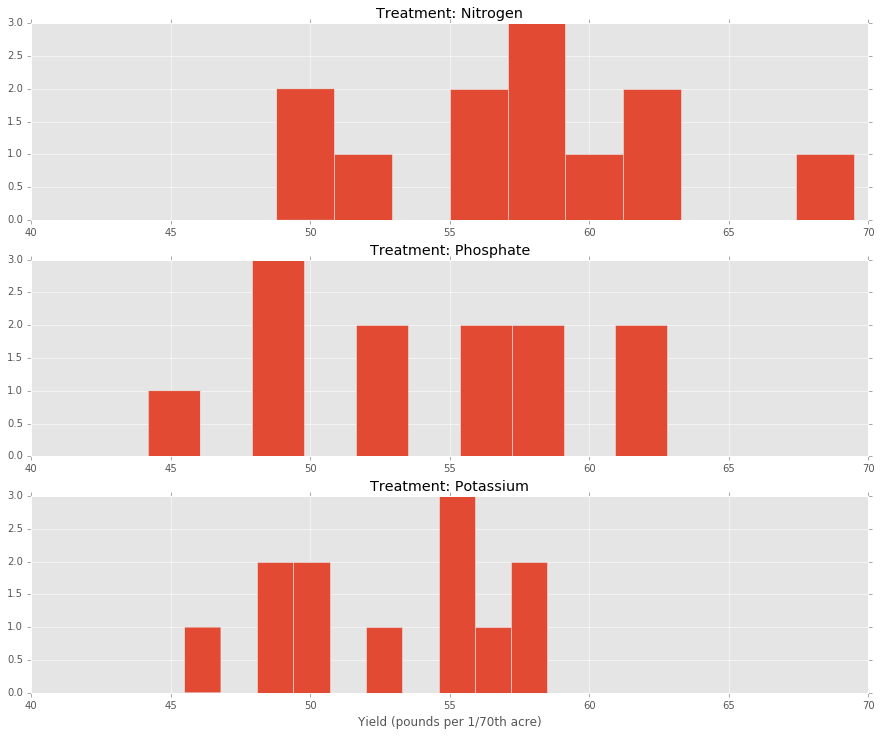

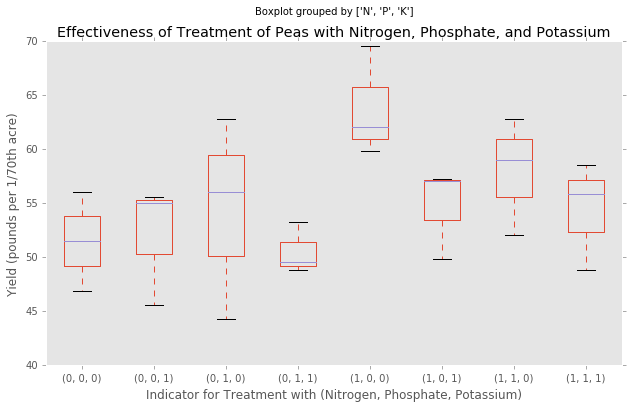

In [14]:
# individual treatments
plt.figure(figsize=(15,12))
plt.subplot(3,1,1)
npk[npk['N']==1]['yield'].hist()
plt.title("Treatment: Nitrogen")
#plt.xlabel("Yield (pounds per 1/70th acre)")
plt.xlim((40,70))

plt.subplot(3,1,2)
npk[npk['P']==1]['yield'].hist()
plt.title("Treatment: Phosphate")
#plt.xlabel("Yield (pounds per 1/70th acre)")
plt.xlim((40,70))

plt.subplot(3,1,3)
npk[npk['K']==1]['yield'].hist()
plt.title("Treatment: Potassium")
plt.xlabel("Yield (pounds per 1/70th acre)")
plt.xlim((40,70))
plt.show()

# combination of treatments
npk.boxplot('yield', by=['N','P','K'], grid=False)
plt.title("Effectiveness of Treatment of Peas with Nitrogen, Phosphate, and Potassium")
plt.ylabel("Yield (pounds per 1/70th acre)")
plt.xlabel('Indicator for Treatment with (Nitrogen, Phosphate, Potassium)')
plt.show()

Nitrogen is the best treatment on average, which we can see by it's histogram being further right than the other two. Potassium is the worst treatment on average.

The best treatment overall, as illustrated with the boxplot, is nitrogen by itself. This is illustrated by its mean nearly being higher than the maximums of all other groups.

- `"swiss"`,standardized fertility measures and socio-economic indicators for French-speaking provinces of Switzerland at about 1888.
    1. What is the relationship in the data between fertility rates and infant mortality?
    2. How are provinces that are predominantly Catholic different from non-Catholic provinces, if at all?
    3. What factors in the data are the most important for predicting fertility?

In [17]:
#data('swiss',show_doc=True)
swiss = data('swiss')
swiss.sample(5)

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Gruyere,82.4,53.3,12,7,97.67,21.0
Moutier,85.8,36.5,12,7,33.77,20.3
Veveyse,87.1,64.5,14,6,98.61,24.5
Rive Droite,44.7,46.6,16,29,50.43,18.2
Delemont,83.1,45.1,6,9,84.84,22.2


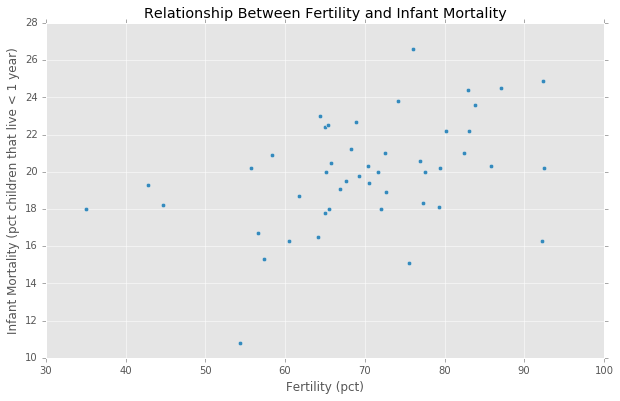

----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------
----------------------------------------------------------------------------------



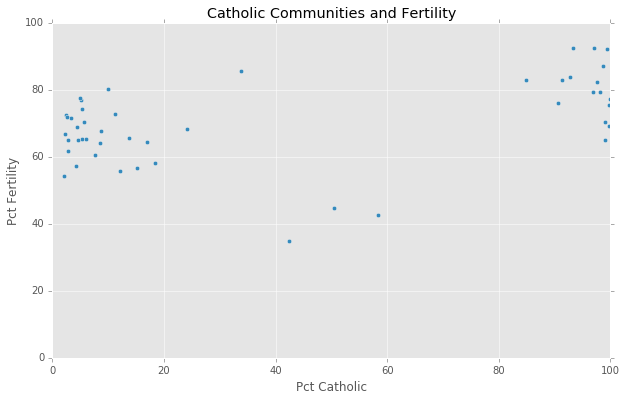

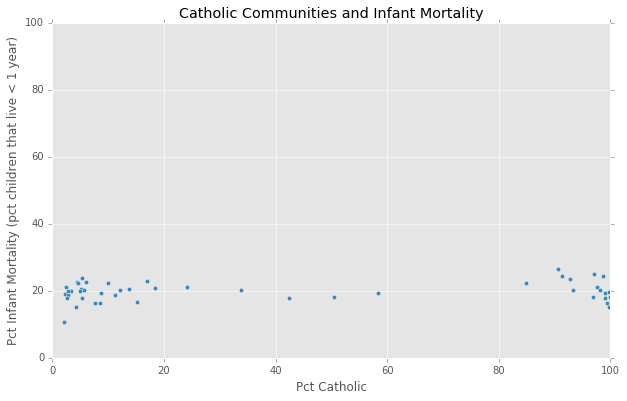

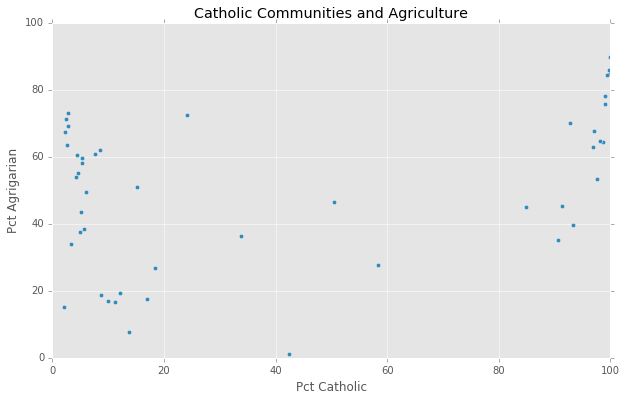

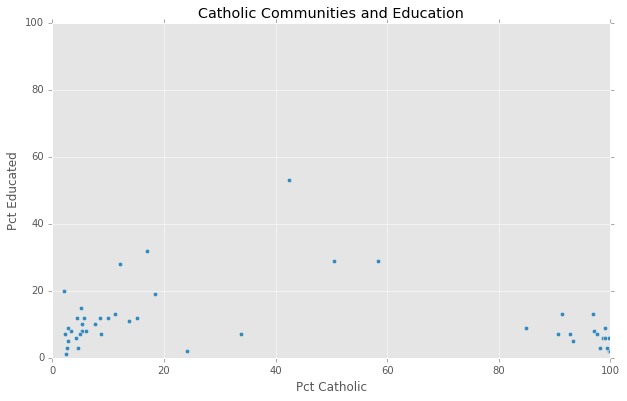

In [61]:
swiss.plot(kind='scatter', x='Fertility', y='Infant.Mortality')
plt.title("Relationship Between Fertility and Infant Mortality")
plt.xlabel("Fertility (pct)")
plt.ylabel("Infant Mortality (pct children that live < 1 year)")
plt.show()

print("----------------------------------------------------------------------------------\n"*5)

swiss.plot(kind='scatter', x='Catholic', y='Fertility')
plt.title("Catholic Communities and Fertility")
plt.xlabel("Pct Catholic")
plt.ylabel("Pct Fertility")
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

swiss.plot(kind='scatter', x='Catholic', y='Infant.Mortality')
plt.title("Catholic Communities and Infant Mortality")
plt.xlabel("Pct Catholic")
plt.ylabel("Pct Infant Mortality (pct children that live < 1 year)")
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

swiss.plot(kind='scatter', x='Catholic', y='Agriculture')
plt.title("Catholic Communities and Agriculture")
plt.xlabel("Pct Catholic")
plt.ylabel("Pct Agrigarian")
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

swiss.plot(kind='scatter', x='Catholic', y='Education')
plt.title("Catholic Communities and Education")
plt.xlabel("Pct Catholic")
plt.ylabel("Pct Educated")
plt.ylim(0,100)
plt.xlim(0,100)
plt.show()

In [28]:
agriculture = pd.qcut(swiss['Agriculture'], 2)
education = pd.cut(swiss['Education'], [0,20,100])
catholic = pd.cut(swiss['Catholic'], [0,50,100], right=True)
swiss.pivot_table(values='Fertility', columns=[agriculture, education], index=catholic)

Agriculture [1.2, 54.1]           (54.1, 89.7]          
Education       (0, 20] (20, 100]      (0, 20] (20, 100]
Catholic                                                
(0, 50]          68.614     51.70       67.058       NaN
(50, 100]        83.400     43.75       79.255       NaN

In [65]:
swiss.corr('spearman')

,Fertility,Agriculture,Examination,Education,Catholic,Infant.Mortality
Fertility,1.000,0.353,-0.646,-0.664,0.464,0.417
Agriculture,0.353,1.000,-0.687,-0.640,0.401,-0.061
Examination,-0.646,-0.687,1.000,0.698,-0.573,-0.114
Education,-0.664,-0.640,0.698,1.000,-0.154,-0.099
Catholic,0.464,0.401,-0.573,-0.154,1.000,0.175
Infant.Mortality,0.417,-0.061,-0.114,-0.099,0.175,1.000


We see from both the Spearman correlation and the pivot table examining Agriculture, Education, and pct Catholic, that all of these seem to be fairly good predictors of fertility. However, education seems to have the strongest predictive power, followed by pct Catholic.


- Examine a data set of your choice. Formulate simple questions about the data and hypothesize the answers to those questions. Demonstrate the correctness of incorrectness of each hypothesis. Explain your conclusions.

In [47]:
birthwt = data('birthwt')
#data('birthwt',show_doc=True)
#birthwt.sample(5)

I hypothesize that smoking increases likelihood of low birthweight. I also hypothesize that women who weigh less will have children who are more likely to be of low birthweight.

In [32]:
birthwt.pivot_table(values='low', index='race', columns='smoke')

smoke,0,1
race,,
1,0.091,0.365
2,0.312,0.600
3,0.364,0.417


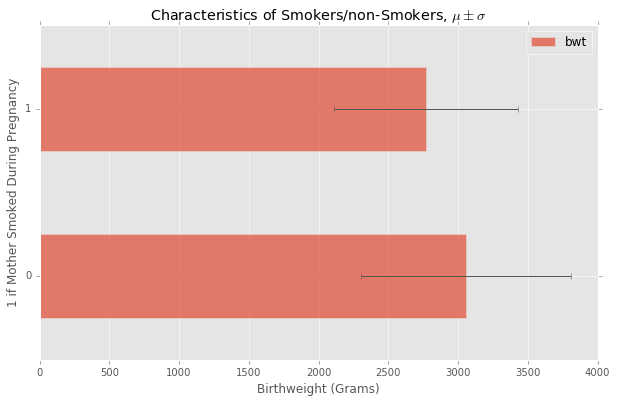

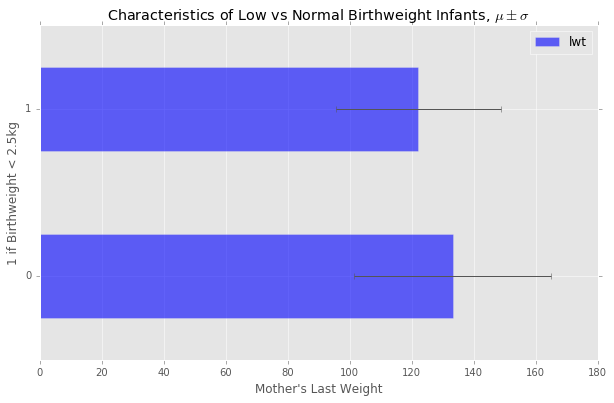

In [46]:
smokers = birthwt.groupby('smoke')
lowbwt = birthwt.groupby("low")

smokers[['bwt']].mean().plot(kind='barh', xerr=smokers[['bwt']].std(), title=r"Characteristics of Smokers/non-Smokers, $\mu\pm\sigma$", alpha=.7)
plt.ylabel('1 if Mother Smoked During Pregnancy')
plt.xlabel("Birthweight (Grams)")
plt.show()

'''smokers[['age']].mean().plot(kind='barh', xerr=smokers[['age']].std(), title=r"Characteristics of Smokers/non-Smokers, $\mu\pm\sigma$", alpha=.6, color='g')
plt.ylabel('1 if Mother Smoked During Pregnancy')
plt.xlabel("Mother's Age")
plt.show()'''

lowbwt[['lwt']].mean().plot(kind='barh', xerr=lowbwt[['lwt']].std(), title=r"Characteristics of Low vs Normal Birthweight Infants, $\mu\pm\sigma$", alpha=.6, color='b')
plt.ylabel('1 if Birthweight < 2.5kg')
plt.xlabel("Mother's Last Weight")
plt.show()

We see from the pivot table that smoking during pregnancy increases likelihood in our empirical distribution across all races. However, it is interesting to note that the difference is much less significant among the "other" category for race. We see this again illustrated in the bar chart where we look at birthweight on the continuous scale and there seems to be a significant difference between the infants who had mother who smoked or did not smoke. However, we do see that having a lighterweight mother increases likelihood of being low birthweight also. "Like mother, like daughter," as they say.